In [1]:
import pandas as pd 

In [3]:
df = pd.read_csv(r"C:\Users\LENOVO\Downloads\Customer_Data.csv")
df.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,19877-DEL,Male,35,No,Delhi,7,27,NaN,Yes,No,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,58353-MAH,Female,45,Yes,Maharashtra,14,13,NaN,Yes,Yes,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,25063-WES,Male,51,No,West Bengal,4,35,Deal 5,Yes,No,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,59787-KAR,Male,79,No,Karnataka,3,21,Deal 4,Yes,No,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,28544-TAM,Female,80,No,Tamil Nadu,3,8,NaN,Yes,No,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [5]:
df.shape

(6418, 32)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6418 entries, 0 to 6417
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer_ID                  6418 non-null   object 
 1   Gender                       6418 non-null   object 
 2   Age                          6418 non-null   int64  
 3   Married                      6418 non-null   object 
 4   State                        6418 non-null   object 
 5   Number_of_Referrals          6418 non-null   int64  
 6   Tenure_in_Months             6418 non-null   int64  
 7   Value_Deal                   2870 non-null   object 
 8   Phone_Service                6418 non-null   object 
 9   Multiple_Lines               5796 non-null   object 
 10  Internet_Service             6418 non-null   object 
 11  Internet_Type                5028 non-null   object 
 12  Online_Security              5028 non-null   object 
 13  Online_Backup     

In [9]:
df.isnull().sum()

Customer_ID                       0
Gender                            0
Age                               0
Married                           0
State                             0
Number_of_Referrals               0
Tenure_in_Months                  0
Value_Deal                     3548
Phone_Service                     0
Multiple_Lines                  622
Internet_Service                  0
Internet_Type                  1390
Online_Security                1390
Online_Backup                  1390
Device_Protection_Plan         1390
Premium_Support                1390
Streaming_TV                   1390
Streaming_Movies               1390
Streaming_Music                1390
Unlimited_Data                 1390
Contract                          0
Paperless_Billing                 0
Payment_Method                    0
Monthly_Charge                    0
Total_Charges                     0
Total_Refunds                     0
Total_Extra_Data_Charges          0
Total_Long_Distance_Charges 

In [11]:
# Value_Deal
df['Value_Deal'] = df['Value_Deal'].fillna('None')

# Multiple_Lines
df['Multiple_Lines'] = df['Multiple_Lines'].fillna('No')

# Internet_Type
df['Internet_Type'] = df['Internet_Type'].fillna('None')

# Online_Security
df['Online_Security'] = df['Online_Security'].fillna('No')

# Online_Backup
df['Online_Backup'] = df['Online_Backup'].fillna('No')

# Device_Protection_Plan
df['Device_Protection_Plan'] = df['Device_Protection_Plan'].fillna('No')

# Premium_Support
df['Premium_Support'] = df['Premium_Support'].fillna('No')

# Streaming_TV
df['Streaming_TV'] = df['Streaming_TV'].fillna('No')

# Streaming_Movies
df['Streaming_Movies'] = df['Streaming_Movies'].fillna('No')

# Streaming_Music
df['Streaming_Music'] = df['Streaming_Music'].fillna('No')

# Unlimited_Data
df['Unlimited_Data'] = df['Unlimited_Data'].fillna('No')

# Churn_Category
df['Churn_Category'] = df['Churn_Category'].fillna('Others')

# Churn_Reason
df['Churn_Reason'] = df['Churn_Reason'].fillna('Others')


In [13]:
df.isnull().sum()

Customer_ID                    0
Gender                         0
Age                            0
Married                        0
State                          0
Number_of_Referrals            0
Tenure_in_Months               0
Value_Deal                     0
Phone_Service                  0
Multiple_Lines                 0
Internet_Service               0
Internet_Type                  0
Online_Security                0
Online_Backup                  0
Device_Protection_Plan         0
Premium_Support                0
Streaming_TV                   0
Streaming_Movies               0
Streaming_Music                0
Unlimited_Data                 0
Contract                       0
Paperless_Billing              0
Payment_Method                 0
Monthly_Charge                 0
Total_Charges                  0
Total_Refunds                  0
Total_Extra_Data_Charges       0
Total_Long_Distance_Charges    0
Total_Revenue                  0
Customer_Status                0
Churn_Cate

In [15]:

import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
##How many customers are there by Gender?
df['Gender'].value_counts()

Gender
Female    4048
Male      2370
Name: count, dtype: int64

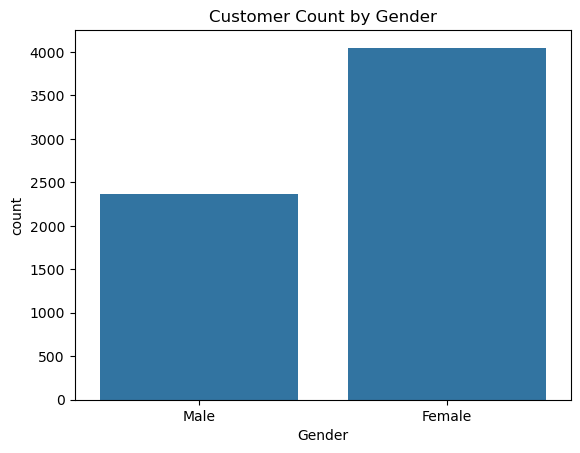

In [19]:
sns.countplot(x='Gender', data=df)
plt.title("Customer Count by Gender")
plt.show()

In [21]:
#How many customers by Contract type?
df['Contract'].value_counts()

Contract
Month-to-Month    3286
Two Year          1719
One Year          1413
Name: count, dtype: int64

In [23]:
##Customer Status vs Revenue?
df.groupby('Customer_Status')['Total_Revenue'].sum()

Customer_Status
Churned     3411960.58
Joined        49281.56
Stayed     16010148.27
Name: Total_Revenue, dtype: float64

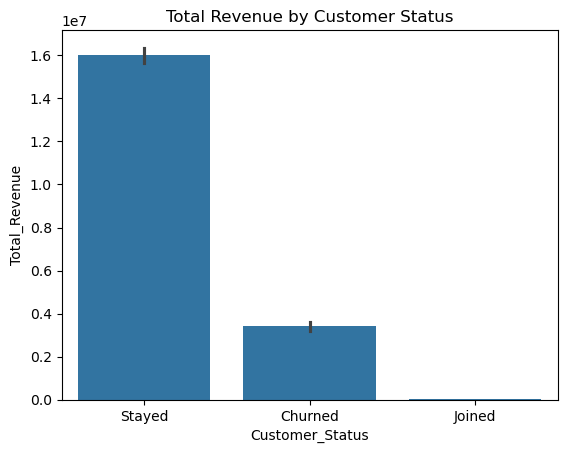

In [25]:
sns.barplot(x='Customer_Status', y='Total_Revenue', data=df, estimator=sum)
plt.title("Total Revenue by Customer Status")
plt.show()

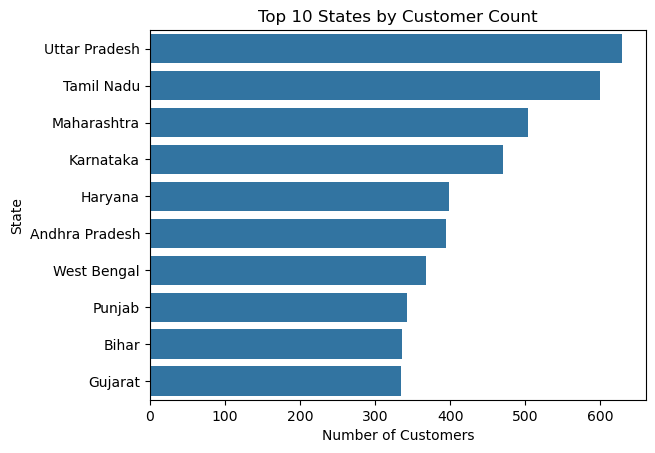

In [27]:
##Which states have most customers?
top_states = df['State'].value_counts().head(10)

sns.barplot(x=top_states.values, y=top_states.index)
plt.title("Top 10 States by Customer Count")
plt.xlabel("Number of Customers")
plt.ylabel("State")
plt.show()

In [29]:
# correlation 
df[['Monthly_Charge','Total_Charges','Total_Revenue','Tenure_in_Months']].corr()


,Monthly_Charge,Total_Charges,Total_Revenue,Tenure_in_Months
Monthly_Charge,1.000000,0.623008,0.562727,-0.005104
Total_Charges,0.623008,1.000000,0.972069,-0.000433
Total_Revenue,0.562727,0.972069,1.000000,0.001181
Tenure_in_Months,-0.005104,-0.000433,0.001181,1.000000


In [31]:
df.to_csv("prod_Churn.csv", index=False)

In [33]:
df[df['Customer_Status'].isin(['Churned','Stayed'])]
df[df['Customer_Status']=='Joined']

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
17,93520-GUJ,Female,67,No,Gujarat,13,19,Deal 5,Yes,Yes,...,Bank Withdrawal,72.10,72.10,0.0,0,7.77,79.87,Joined,Others,Others
23,57256-BIH,Female,18,No,Bihar,9,7,None,Yes,No,...,Credit Card,19.85,57.20,0.0,0,9.36,66.56,Joined,Others,Others
48,72357-MAD,Female,53,No,Madhya Pradesh,14,12,Deal 5,Yes,No,...,Credit Card,44.30,44.30,0.0,0,42.95,87.25,Joined,Others,Others
98,66612-KAR,Female,58,Yes,Karnataka,11,18,None,Yes,No,...,Credit Card,19.95,58.00,0.0,0,8.07,66.07,Joined,Others,Others
104,22119-WES,Male,31,Yes,West Bengal,5,5,None,Yes,No,...,Credit Card,20.05,33.70,0.0,0,3.62,37.32,Joined,Others,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6333,31412-HAR,Female,81,Yes,Haryana,14,29,None,Yes,No,...,Bank Withdrawal,19.20,37.20,0.0,0,14.06,51.26,Joined,Others,Others
6374,54997-UTT,Female,55,No,Uttar Pradesh,7,23,None,Yes,No,...,Credit Card,44.00,44.00,0.0,0,26.15,70.15,Joined,Others,Others
6392,56728-RAJ,Male,40,No,Rajasthan,0,1,None,Yes,No,...,Credit Card,45.60,45.60,0.0,0,37.44,83.04,Joined,Others,Others
6401,47624-TAM,Female,62,Yes,Tamil Nadu,7,29,None,Yes,No,...,Mailed Check,-5.00,189.10,0.0,0,100.59,289.69,Joined,Others,Others


In [35]:
vw_churn_data = df[df['Customer_Status'].isin(['Churned','Stayed'])]
vw_join_data  = df[df['Customer_Status'] == 'Joined']


In [37]:
vw_churn_data.to_csv("vw_ChurnData.csv", index=False)
vw_join_data.to_csv("vw_JoinData.csv", index=False)

In [15]:
df['Internet_Type'].value_counts()

Internet_Type
Fiber Optic    2764
DSL            1502
None           1390
Cable           762
Name: count, dtype: int64